<a href="https://colab.research.google.com/github/Vonewman/Natural_Language_Processing/blob/master/Create_your_fist_wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating your fisrt wordcloud

In [1]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Content from wikipedia

Wikipedia is a great source of quality text. 
We use the Wikipedia API to get the text of a page given its title


In [2]:
# 1) import the necessary library
import requests

# 2) set the title of the page (uncomment to change the page)
title = 'Earth'

# 3) send a request to the wikipedia api 
# asking to return content of the page formatted as json

response = requests.get(
    'https://en.wikipedia.org/w/api.php',
    params={
        'action': 'query',
        'format': 'json',
        'titles': title,
        'prop': 'extracts',
        'explaintext': True,
    }).json()
    
# 4) Parse the result and extract the text
page = next(iter(response['query']['pages'].values()))
text = page['extract']

In [17]:
print(text)

Earth is the third planet from the Sun and home to all known life. While large volumes of water can be found throughout the Solar System, only Earth sustains liquid surface water. Approximately 70.8% of Earth's surface is made up of the ocean, dwarfing Earth's polar ice, lakes, and rivers. The remaining 29.2% of Earth's surface is land, consisting of continents and islands. Earth's surface layer is formed of several slowly moving tectonic plates, which interact to produce mountain ranges, volcanoes, and earthquakes. Earth's liquid outer core generates the magnetic field that shapes the magnetosphere of Earth, deflecting destructive solar winds.
The atmosphere of Earth consists mostly of nitrogen and oxygen. Greenhouse gases in the atmosphere like carbon dioxide (CO2) trap a part of the energy from the Sun close to the surface. Water vapor is widely present in the atmosphere and forms clouds that cover most of the planet. More solar energy is received by tropical regions than polar regi

In [18]:
from wordcloud import WordCloud


# Instantiate / create a new wordcloud.
wordcloud = WordCloud()

# Apply the wordcloud to the text.
wordcloud.generate(text)

(-0.5, 399.5, 199.5, -0.5)

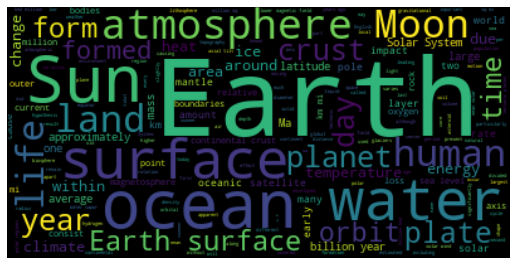

In [19]:
# Import matplotlib
import matplotlib.pyplot as plt

# create a figure
fig, ax = plt.subplots(1,1, figsize = (9,6))


# add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')

# and remove the axis
plt.axis("off")

In [21]:
import requests

def wikipedia_page(title):
    '''
    This function returns the raw text of a wikipedia page 
    given a wikipedia page title
    '''
    params = { 
        'action': 'query', 
        'format': 'json', # request json formatted content
        'titles': title, # title of the wikipedia page
        'prop': 'extracts', 
        'explaintext': True
    }
    # send a request to the wikipedia api 
    response = requests.get(
         'https://en.wikipedia.org/w/api.php',
         params= params
     ).json()

    # Parse the result
    page = next(iter(response['query']['pages'].values()))
    # return the page content 
    if 'extract' in page.keys():
        return page['extract']
    else:
        return "Page not found"

(-0.5, 799.5, 399.5, -0.5)

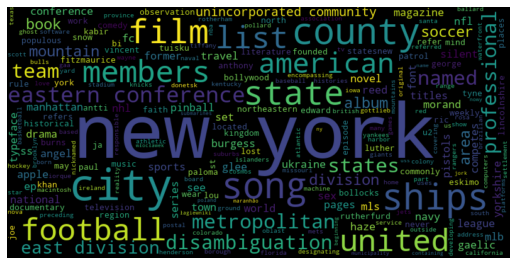

In [22]:
# Text
text = wikipedia_page('New_York').lower()
# Wordcloud
wordcloud = WordCloud(
        random_state = 8,
        normalize_plurals = False,
        width = 800, 
        height= 400,
        max_words = 400)
wordcloud.generate(text)
# plot
fig, ax = plt.subplots(1,1, figsize = (9,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")